In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\My PC\Downloads\facebook_ads_data.csv")
print(df)

         ad_date campaign_name  total_spend  total_impressions  total_clicks  \
0     2022-11-05     Expansion         0.00                  0             0   
1     2022-11-01     Expansion         0.00                  0             0   
2     2022-10-31     Expansion       227.45               6054            58   
3     2022-10-30     Expansion       335.91              27562            69   
4     2022-10-29     Expansion       714.03              33358           115   
...          ...           ...          ...                ...           ...   
1489  2020-11-15     Discounts         6.98              12465           657   
1490  2020-11-14     Discounts         7.27               5005           392   
1491  2020-11-13     Discounts         6.36              11669           451   
1492  2020-11-12     Discounts        23.00              10473           397   
1493  2020-11-11     Discounts         1.89               1800            45   

      total_value   cpc    cpm       ct

In [4]:
# Grupează datele după zile și creează două grafice pentru datele grupate
daily_stats = df.groupby('ad_date')[['total_spend','total_clicks','total_value','total_impressions']].sum()
print(daily_stats)

            total_spend  total_clicks  total_value  total_impressions
ad_date                                                              
2020-11-11         1.89            45         2.38               1800
2020-11-12        23.00           397        21.13              10473
2020-11-13         6.36           451         9.77              11669
2020-11-14         7.27           392        12.67               5005
2020-11-15         6.98           657        10.96              12465
...                 ...           ...          ...                ...
2022-10-29       714.03           115       680.34              33358
2022-10-30       335.91            69       472.61              27562
2022-10-31       227.45            58       191.87               6054
2022-11-01         0.00             0         0.00                  0
2022-11-05         0.00             0         0.00                  0

[547 rows x 4 columns]


In [5]:
daily_stats['romi'] = daily_stats['total_value']/daily_stats['total_spend']
daily_stats = daily_stats.reset_index()
print(daily_stats)

        ad_date  total_spend  total_clicks  total_value  total_impressions  \
0    2020-11-11         1.89            45         2.38               1800   
1    2020-11-12        23.00           397        21.13              10473   
2    2020-11-13         6.36           451         9.77              11669   
3    2020-11-14         7.27           392        12.67               5005   
4    2020-11-15         6.98           657        10.96              12465   
..          ...          ...           ...          ...                ...   
542  2022-10-29       714.03           115       680.34              33358   
543  2022-10-30       335.91            69       472.61              27562   
544  2022-10-31       227.45            58       191.87               6054   
545  2022-11-01         0.00             0         0.00                  0   
546  2022-11-05         0.00             0         0.00                  0   

         romi  
0    1.259259  
1    0.918696  
2    1.536164  

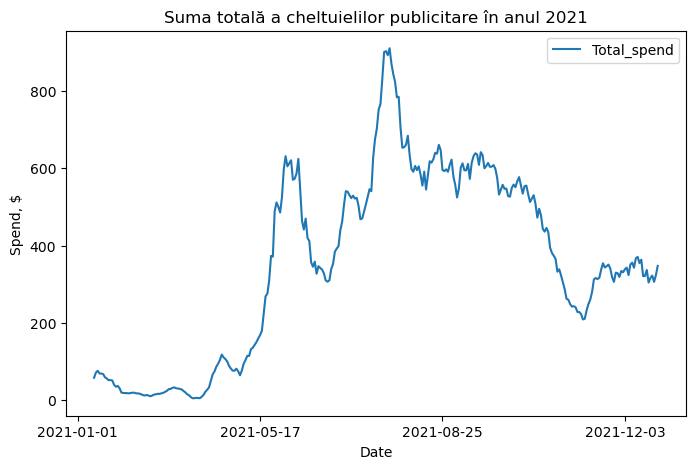

In [6]:
# Un grafic cu suma totală a cheltuielilor publicitare în anul 2021.Aplică metoda rolling() pentru a afișa o medie mobilă a cheltuielilor și a ROMI-ului.
daily_stats_2021 = daily_stats[(daily_stats['ad_date']>='2021-01-01') & (daily_stats['ad_date']<='2021-12-21')]
plt.figure(figsize=(8,5),dpi=100)
plt.plot(daily_stats_2021['ad_date'],daily_stats_2021['total_spend'].rolling(10).mean(),label='Total_spend')
plt.legend()
plt.title('Suma totală a cheltuielilor publicitare în anul 2021')
plt.xlabel('Date')
plt.ylabel('Spend, $')
plt.xticks(list(daily_stats_2021['ad_date'])[::100])
plt.show()


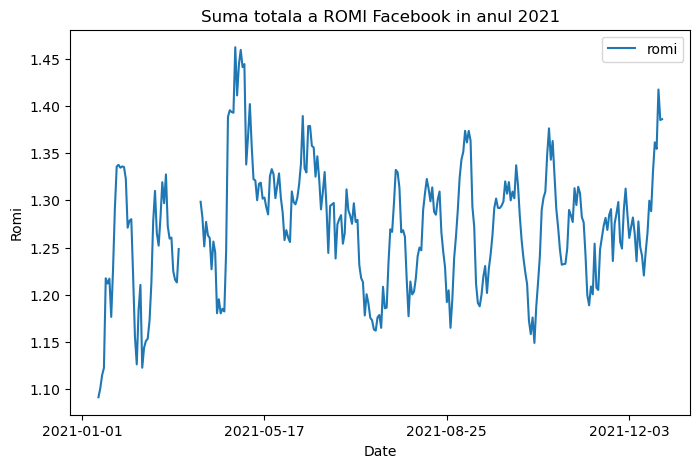

In [7]:
# Un grafic cu ROMI-ul zilnic în anul 2021.Aplică metoda rolling() pentru a afișa o medie mobilă a cheltuielilor și a ROMI-ului.
plt.figure(figsize=(8,5),dpi=100)
plt.plot(daily_stats_2021['ad_date'],daily_stats_2021['romi'].rolling(10).mean(),label='romi')
plt.legend()
plt.title('Suma totala a ROMI Facebook in anul 2021')
plt.xlabel('Date')
plt.ylabel('Romi')
plt.xticks(list(daily_stats_2021['ad_date'])[::100])
plt.show()


In [8]:
# Grupează datele după numele campaniei și creează două grafice
campaign_stats = df.groupby('campaign_name')[['total_spend','total_value']].sum()
print(campaign_stats)

                 total_spend  total_value
campaign_name                            
Brand                 539.92       670.15
Crazy discounts      2175.29      2583.59
Discounts            2856.39      3516.27
Electronics         23920.42     29169.38
Expansion           67212.82     83288.66
Hobbies             11326.97     13974.63
Lookalike           63631.09     80234.70
New items            2936.97      3742.05
Promos               4993.84      8793.77
Trendy               1992.31      3798.90
Wholesale           14181.71     17421.33


<Axes: xlabel='total_spend', ylabel='campaign_name'>

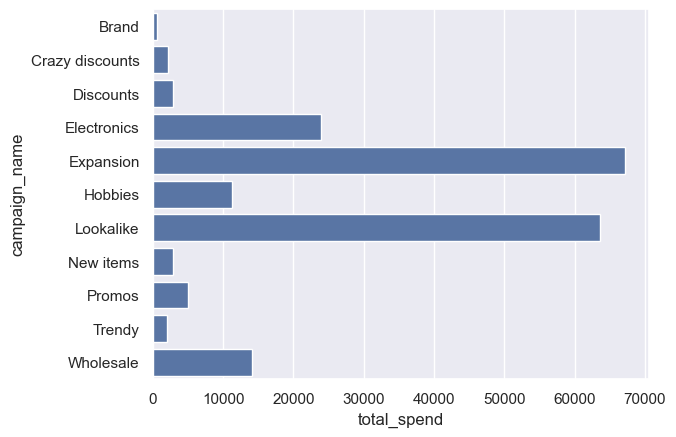

In [9]:
# Un grafic cu suma totală a cheltuielilor publicitare pentru fiecare campanie
sns.set_theme()
sns.barplot(x='total_spend',y='campaign_name',data=campaign_stats,color='b')

<Axes: xlabel='ROMI', ylabel='campaign_name'>

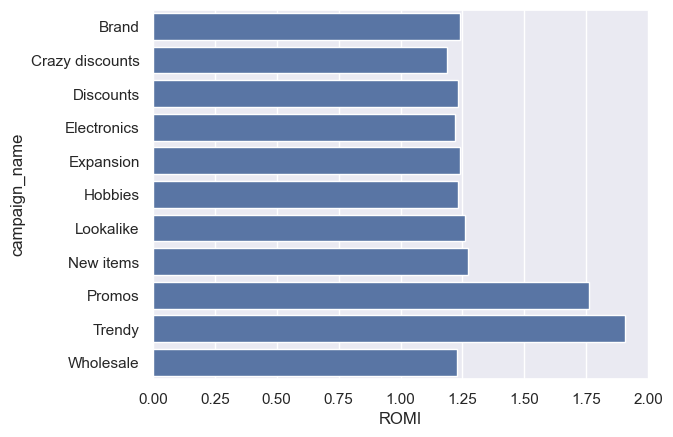

In [10]:
# Un grafic cu ROMI-ul total pentru fiecare campanie.
campaign_stats['ROMI']= campaign_stats['total_value'] / campaign_stats['total_spend']
campaign_stats
sns.barplot(x='ROMI',y='campaign_name',data=campaign_stats,color='b')

<Axes: xlabel='campaign_name', ylabel='romi'>

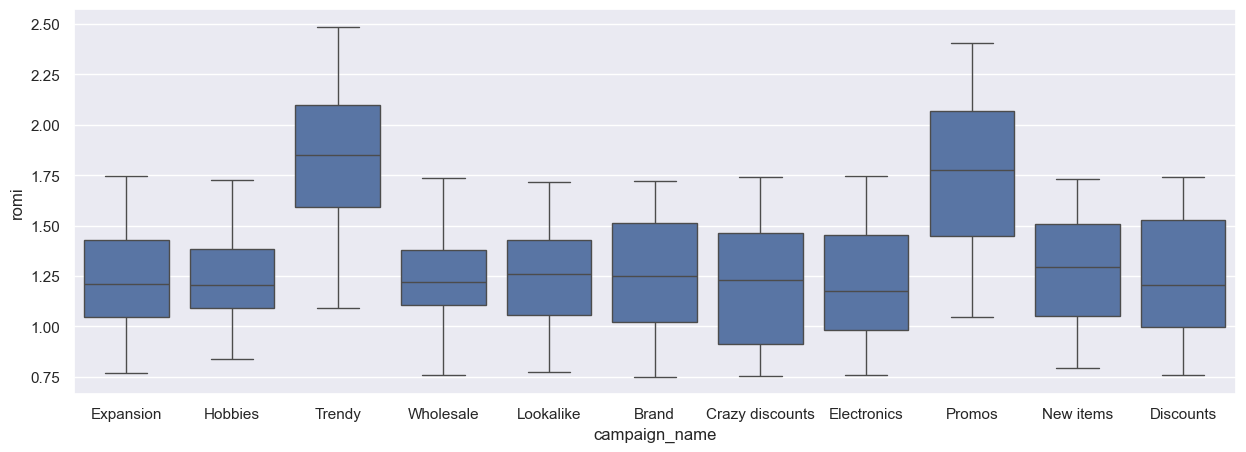

In [14]:
# Utilizând un box plot, determină distribuția ROMI-ului zilnic în fiecare campanie (după numele campaniei).
plt.figure(figsize=(15,5),dpi=100)
sns.boxplot(x='campaign_name', y='romi',data=df)

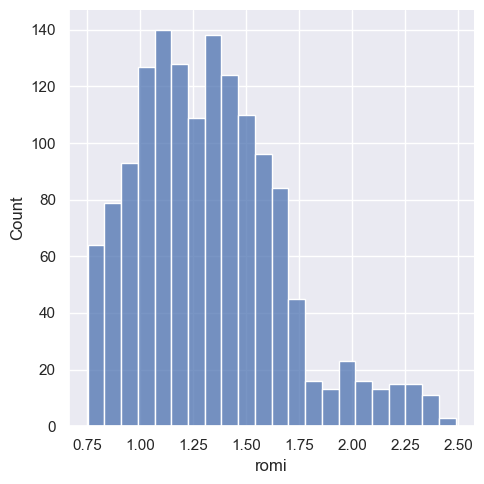

In [11]:
# Creează o histogramă cu distribuția valorilor ROMI din tabelul facebook_ads_data.csv.
sns.displot(data=df,x='romi')

<Axes: >

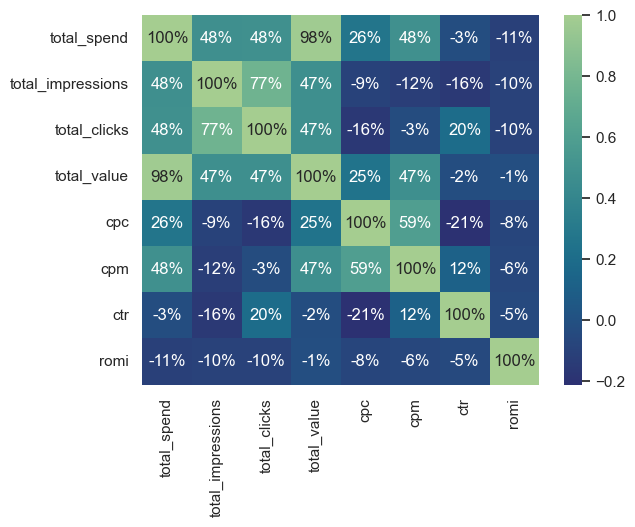

In [22]:
# Creează un heat map a corelației între toți indicatorii numerici din tabelul facebook_ads_data.csv. Care indicatori au cea mai mare și cea mai mică corelație? Cu ce corelează “total_value”?
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.0%',cmap='crest_r')


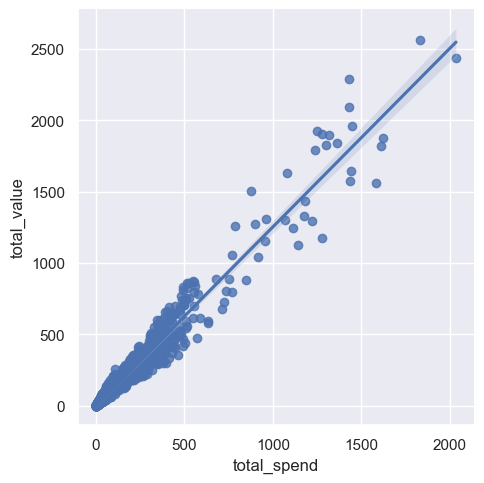

In [13]:
# Creează un grafic cu puncte cu regresie liniară (poți folosi funcția lmplot()), pe baza datelor din “total_spend” și “total_value” pentru a vizualiza relația dintre aceste variabile
sns.lmplot(data=df,x='total_spend',y='total_value')